In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Songti SC']  #MacOS自带字体
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['figure.dpi'] = 400
import seaborn as sns
import scienceplots
import numpy as np
from numpy.polynomial.polynomial import polyvander

In [2]:
np.random.seed(10)
np.random.randn(3)
X = np.array([np.pi/8, np.pi/6, np.pi/4, np.pi/3, np.pi/3.5, np.pi/5])
M = X.shape[0]
Y = np.sin(X) + np.random.randn(M)*0.1
# Y = np.sin(X)
xRange = np.linspace(0,np.pi/2,100)
def L(x):
    l = lambda i,x: np.prod([(x - X[ind])/(X[i] - X[ind]) for ind in range(M) if ind != i]) 
    yHat = sum([ Y[i]*l(i,x) for i in range(M)])
    return yHat

def P(x):
    A = polyvander(X,M-1)
    coefficient = np.linalg.solve(A, Y)[::-1]
    yHat = np.polyval(coefficient, x)
    return yHat

def N(x):
    A = np.zeros((M,M+1))
    A[:,0] = X
    A[:,1] = Y
    for j in range(2,M+1):
        for i in range(j-1,M):
            A[i,j] = (A[i,j-1] - A[i-1,j-1])/(A[i,0] - A[i-j+1,0])

    yHat = A[0,1]
    for ind in range(1,M):
        yHat += np.prod([(x - A[i,0]) for i in range(ind)])*A[ind,ind+1]
    
    return yHat

YHat_P = [ P(x) for x in xRange]
YHat_L = [ L(x) for x in xRange]
YHat_N = [ N(x) for x in xRange]

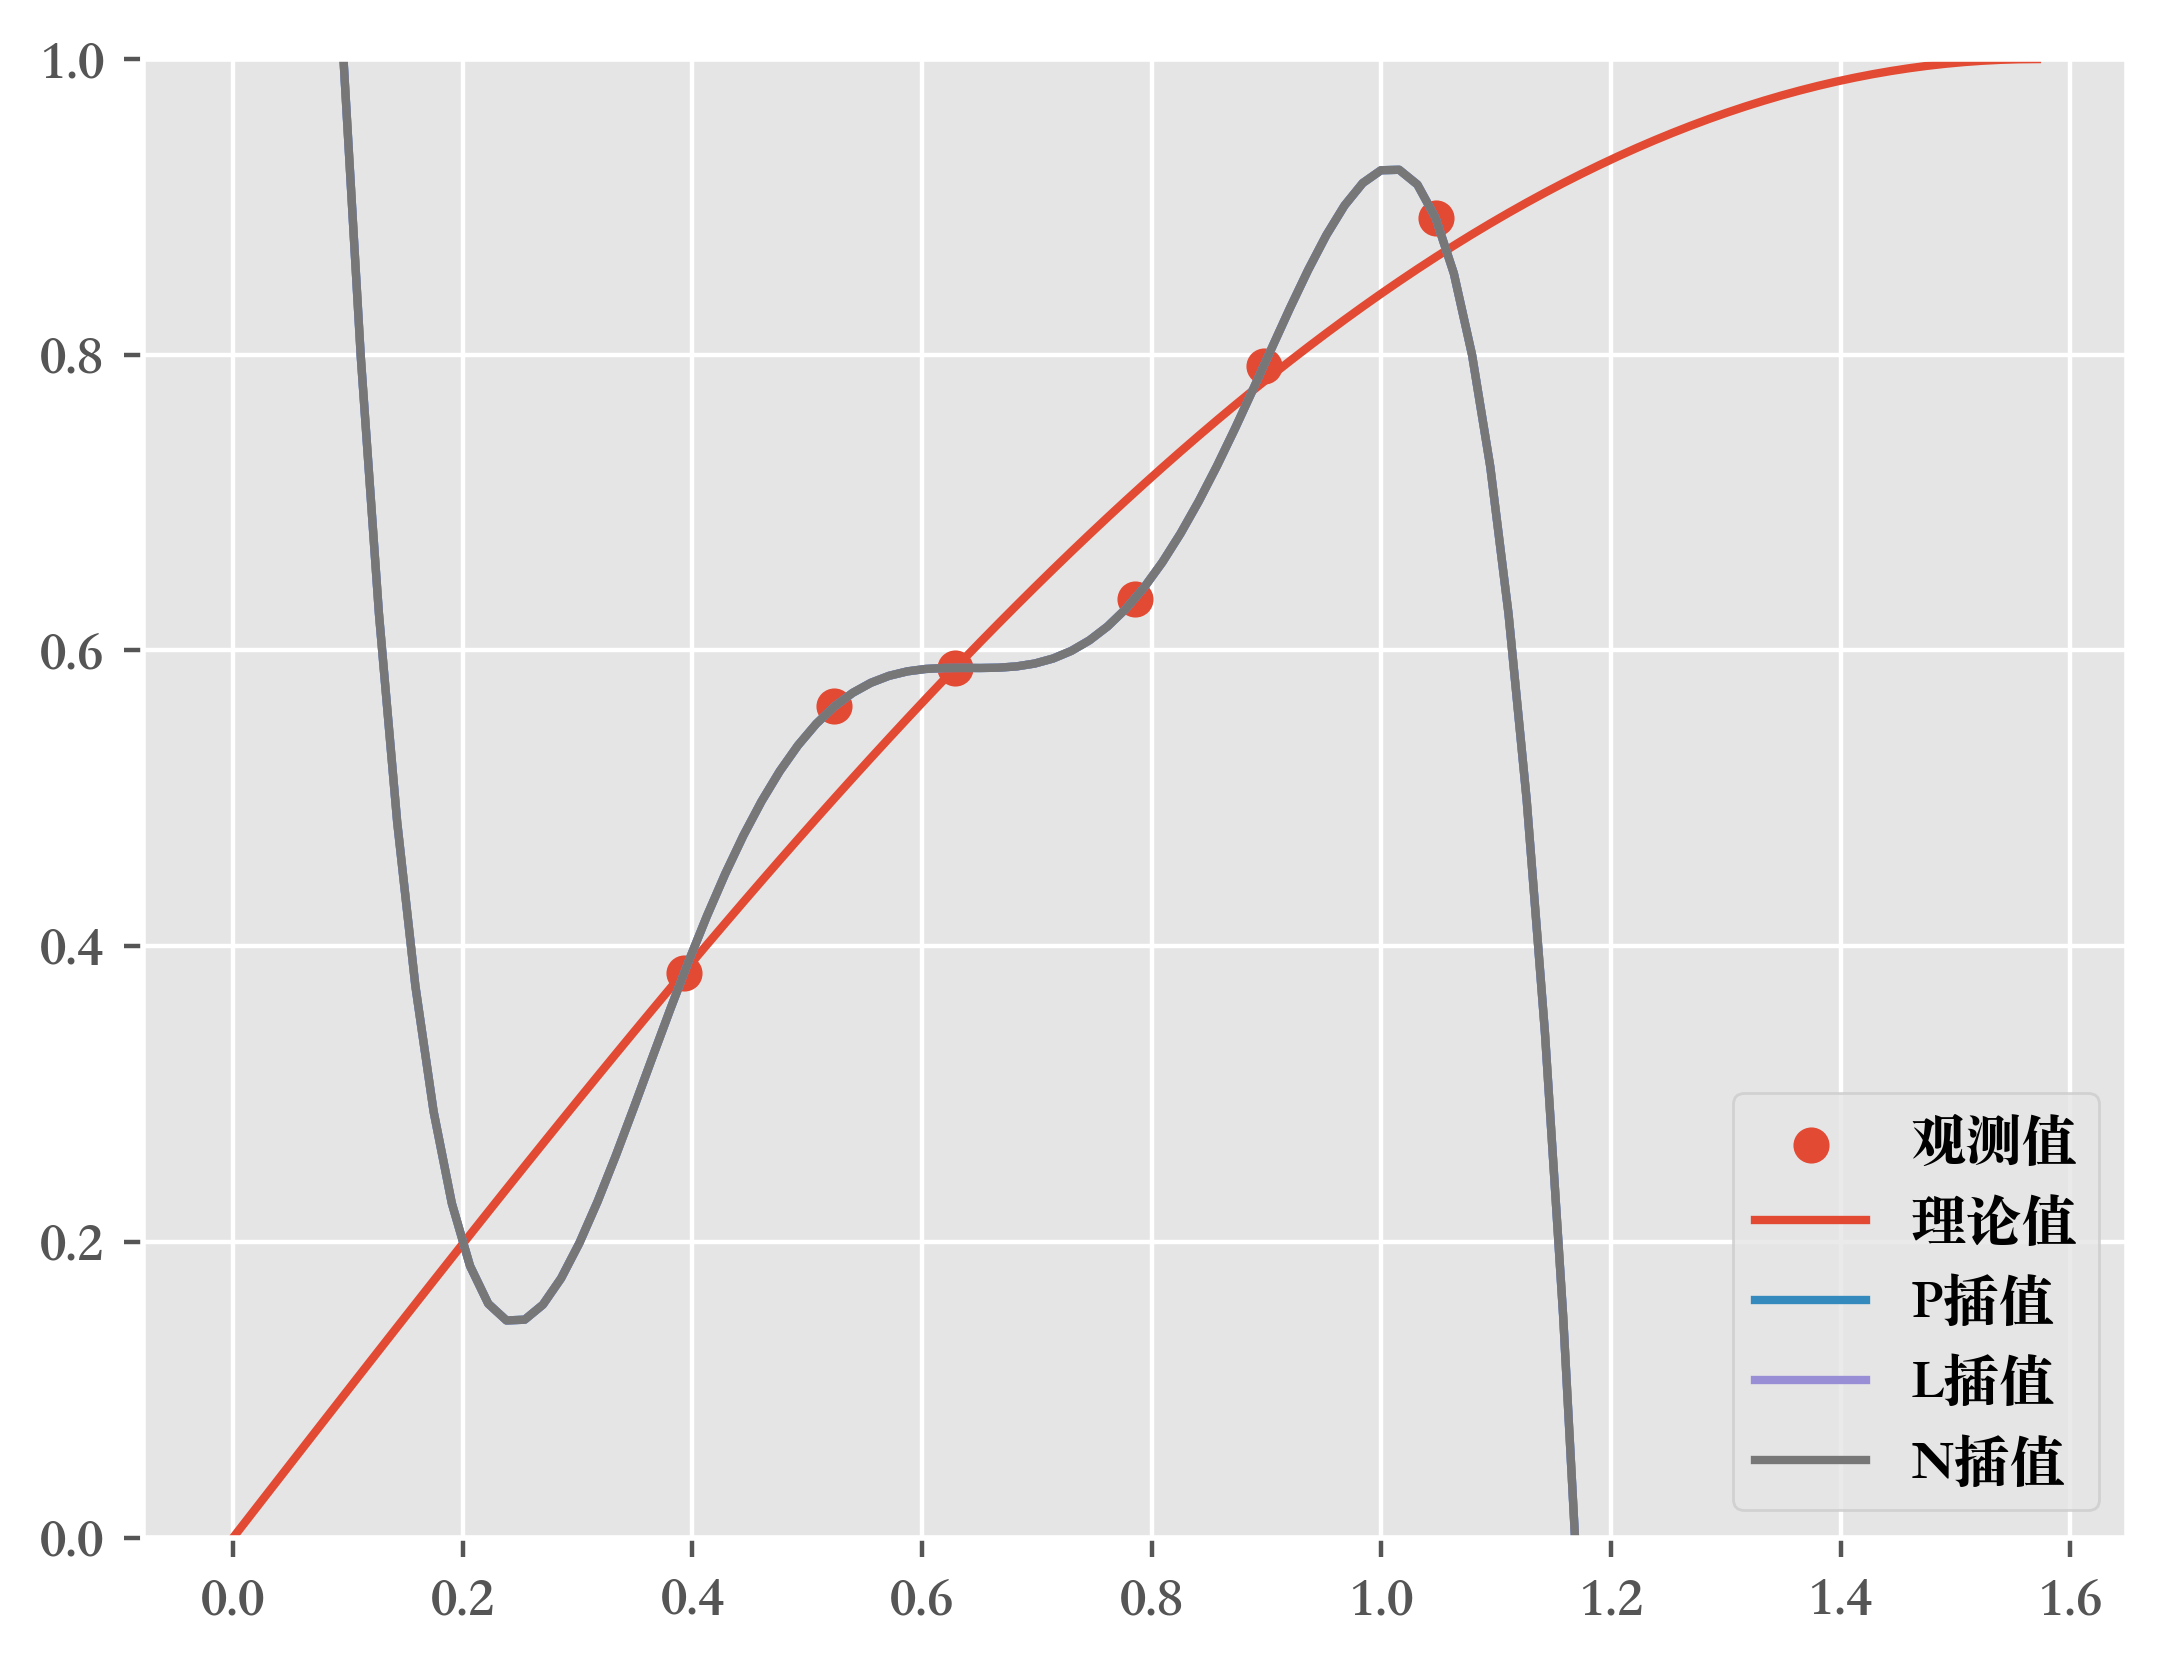

In [3]:
with plt.style.context('ggplot'):
    plt.scatter(X,Y, label="观测值")
    plt.plot(xRange,np.sin(xRange), label='理论值')
    plt.plot(xRange, YHat_P, label='P插值')
    plt.plot(xRange, YHat_L, label='L插值')
    plt.plot(xRange, YHat_N, label='N插值')
    plt.ylim(0,1)
    plt.legend()
    plt.show()